<a href="https://colab.research.google.com/github/m4xig1/Abstract-on-math-analysis-1/blob/main/HSE_Linalg_Lab_Fall_2022(Maxim_Ignatov_2211).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [3]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [4]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по (k-1)-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [5]:
Z = np.zeros((3, 4))
Z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
dd = np.diag([1,2,3,4,5])
dd

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [7]:
tr = dd.trace()
tr

15

In [8]:
minusdd = sla.inv(dd)
minusdd
# print(minusdd @ dd)

array([[ 1.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [9]:
X = np.random.rand(4,5)
X

array([[0.99663985, 0.95845207, 0.01539453, 0.3572883 , 0.69162315],
       [0.98040616, 0.90074981, 0.48065617, 0.40193077, 0.31602708],
       [0.15195682, 0.25686852, 0.20680236, 0.86346916, 0.35267131],
       [0.98703583, 0.83558678, 0.6192419 , 0.66159952, 0.4328913 ]])

In [10]:
sliced = X[np.ix_([1, 2],[0,1])] # нумирация с 1 по усл.
sla.det(sliced)

0.1149603980027481

In [11]:
X.T @ X

array([[2.95181784, 2.7021192 , 1.12922004, 1.53437563, 1.48000412],
       [2.7021192 , 2.49416729, 1.01825723, 1.47910463, 1.39985737],
       [1.12922004, 1.01825723, 0.65749509, 0.78694839, 0.50354527],
       [1.53437563, 1.47910463, 0.78694839, 1.4724962 , 0.96505135],
       [1.48000412, 1.39985737, 0.50354527, 0.96505135, 0.88998762]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [12]:
def my_det(X):
    if X.shape[0] != X.shape[1]:
        raise ValueError 
    temp = X.copy()
    # приведем матрицу к верхнетреугольной
    znamenat = 1
    for i in range(temp.shape[0]-1):
        for j in range(i+1, temp.shape[0]):
            if temp[i][i] != 0 and temp[j][i] != 0:
                koef = temp[i][i]
                aa = temp[i,:].copy() * temp[j][i]
                temp[j, :] *= koef
                znamenat *= koef
                temp[j,:] -= aa 
            elif temp[i][i] == 0 and temp[j][i] != 0:
                temp[i] += temp[j]
                temp[j] -= temp[i]
    # определитель верх. треуг. матрицы вычисляется как произведение элементов на главной диагонали
    det = temp.diagonal().prod() 
    return det/ znamenat


Простая проверка:

In [13]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
# X = np.array([[1,2,0,6], [4,2,1,3], [2,3,9,0], [0,1,3,5]])
print(my_det(X), sla.det(X))

-1.0 -1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [28]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    # print(my_det(X), sla.det(X))
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17 µs ± 4.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
476 µs ± 85.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
199 µs ± 9.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


15.5 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.9 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
769 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


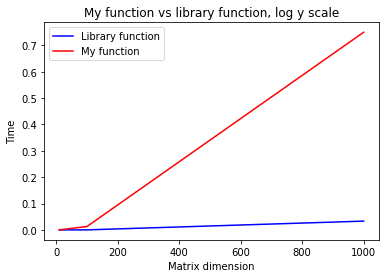

In [15]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

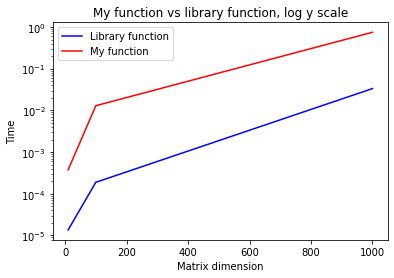

In [16]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [17]:
A = np.array([[1,0],[10**20, 1]])
B = np.array([[1/10**20,1],[0, 1 - 10 **20]])

In [18]:
A @ B

array([[1e-20, 1],
       [1.0, 1]], dtype=object)

In [19]:
A = A.astype('float64') 
B= B.astype('float64') 
A @ B

array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])

И какой из них правильный?

---
$$\begin{pmatrix}
10^{-20} & 1\\
1 & 1 
\end{pmatrix}$$

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [20]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0][i] = 1
    for i in range(dim):
        P[i][0] = 1
        for j in range(1, dim):
            P[i][j] = P[i-1][j] + P[i][j-1]
    return P
print(my_pascal(4))
print(sla.pascal(4))
print(my_det(my_pascal(6)))

[[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]
[[ 1  1  1  1]
 [ 1  2  3  4]
 [ 1  3  6 10]
 [ 1  4 10 20]]
1.0


Чему равен её определитель? **Строго** поясните свой ответ.

----
Заметим, что любой элемент матрицы $P_{ij} = P_{(i-1)j} + P_{i(j-1)}$(для всех i, j > 1). Тогда последовательно вычтем из нижней $P_i$ строку $P_{i-1}$, зная, что $C_n^k = C_{n-1}^k + C^{k-1}_n ⟹ P_{ij} = P_{(i-1)j} + P_{i(j-1)}$ (для всех i, j > 1). Таким образом сведем матрицу к верхнетреугольному виду, на главной диагонали которой будут стоять 1(легко понять, потому что слева от каждой единицы будет 0, а справа 1, т.к. самая верхняя строчка была заполнена 1). **Определитель матрицы паскаля равен 1**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [21]:
sla.det(sla.pascal(30))

-3.400444993542751e+51

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [22]:
def prod_and_sq_sum(A):
    print(A.diagonal().prod())
    sm = A.diagonal()**2
    print(sm.sum())
M = np.array([[1,2,3],[2,3,4],[4,2,4]])
print(M)
prod_and_sq_sum(M)

[[1 2 3]
 [2 3 4]
 [4 2 4]]
12
26



**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [23]:
def f(A, B, lmbd, k):
    return (B[:, :k].T @ A[:,:k] @ np.diag(lmbd[:k])).trace()

A = np.random.randint(10, size=(3, 4))
B = np.random.randint(10, size=(3, 4))
lmbd = np.random.randint(10, size=4)
print(A, B, lmbd, sep='\n')
print(f(A,B,lmbd, 2))

[[1 1 3 9]
 [4 2 7 3]
 [6 4 5 0]]
[[4 9 3 8]
 [0 4 0 5]
 [2 7 1 6]]
[9 3 9 5]
279


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [24]:
def get_diag(A,B):
        return np.sum(A * B.T, axis=1)

A = np.random.randint(100, size=(4, 4))
B = np.random.randint(100, size=(4, 4))

# print(A@B.diagonal())
print('Gigachad ans:')
print(get_diag(A,B))
print('Avarage ans')
print((A@B).diagonal())


Gigachad ans:
[4787 7238 2335 2247]
Avarage ans
[4787 7238 2335 2247]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [171]:
import cmath
def shrink_rotate(x:complex, a:complex, coef=1., angle=0.):
    Vec = (x-a)*coef # AX умноженный на coef
    Vec = Vec * np.cos(angle) + np.sin(angle) *1j
    return Vec + a
    
def shrink_rotate_conj(x:complex, a:complex, coef=1., angle=0.):
    ch = shrink_rotate(x, a, coef, angle)
    ch -= a
    # для того чтобы построить отраженную относительно горизонтальной оси точку достаточно найти ее сопряженное 
    return np.conj(ch) + a

def geometric_inverse(x:complex, a:complex, r):
    x_a, x_b = x.real, x.imag
    a_a, a_b = a.imag, a.imag
    if x_a == a_a and x_b == a_b:
        return (np.inf + 1j * np.inf)
    a = a_a + (r**2 * (x_a - a_a)/((x_a - a_a)**2 + (x_b - a_b)**2))
    b = a_b + (r**2 * (x_b - a_b)/((x_a - a_a)**2 + (x_b - a_b)**2))
    return complex(a, b)

print(shrink_rotate(complex(1,2), complex(2,-1), 0.5, 0))
print(shrink_rotate(complex(1,2), complex(2,-1), 1, 2*cmath.pi)) 
print(shrink_rotate_conj(complex(1,2), complex(2,-1), 0.5, 1))
print(geometric_inverse(complex(2,10), complex(2,2), 10))

(1.5+0.5j)
(1+1.9999999999999996j)
(1.7298488470659301-2.651924443610106j)
(2+14.5j)


В общем случае инверсия относительно окружности с центром в точке ${\displaystyle O=(x_{0},y_{0})}$ и радиусом ${\displaystyle r}$ задаётся соотношением
${\displaystyle (x,y)\mapsto \left(x_{0}+{\frac {r^{2}(x-x_{0})}{(x-x_{0})^{2}+(y-y_{0})^{2}}},y_{0}+{\frac {r^{2}(y-y_{0})}{(x-x_{0})^{2}+(y-y_{0})^{2}}}\right)}$

**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

In [97]:
from tqdm import tqdm

def normalize(x):
    ch = int(x*1000)
    if ch < 0:
        return ch + 1000
    else:
        return ch

z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
values = np.zeros((1000,1000))
v = []
# не помню, предустановлен ли tqdm, если что, можно убрать
for n_iter in tqdm(range(max_iter)):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >=10:
        x, y =normalize(z.real), -normalize(z.imag)
        values[y, x] = 1

100%|██████████| 100000/100000 [00:04<00:00, 23824.28it/s]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


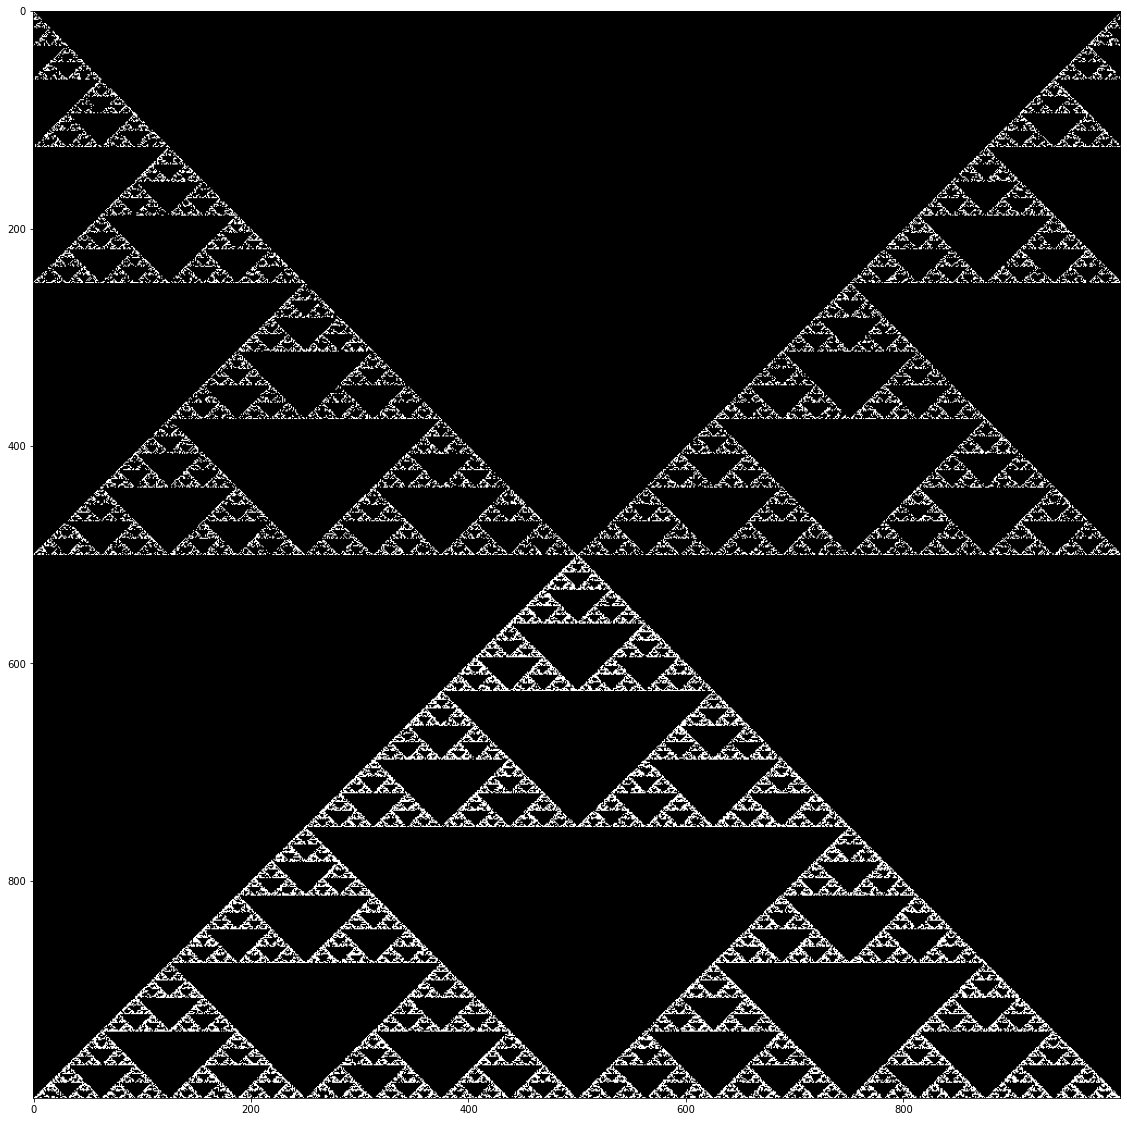

In [98]:
plt.figure(figsize=(20, 20))
plt.imshow(values, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Получили Треугольник Серпинского. Не используя комплексные числа, его можно получить, деля стороны равносторонего треугольника пополам, получая 4 треугольника и отбрасывая центральный. В нашем же случае точка А в функции shrink_rotate выбирается рандомно и означает расположение следующией точки на одном из 3х строящихся треугольников

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

In [120]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))
    ]
values = np.zeros((2000,2000))
v = []
# не помню, предустановлен ли tqdm, если что, можно убрать
for n_iter in tqdm(range(max_iter)):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >=10:
        x, y =normalize(z.real), -normalize(z.imag)
        values[abs(x), abs(y)] = 1

100%|██████████| 100000/100000 [00:04<00:00, 22892.57it/s]


**Он построится, я обещаю**

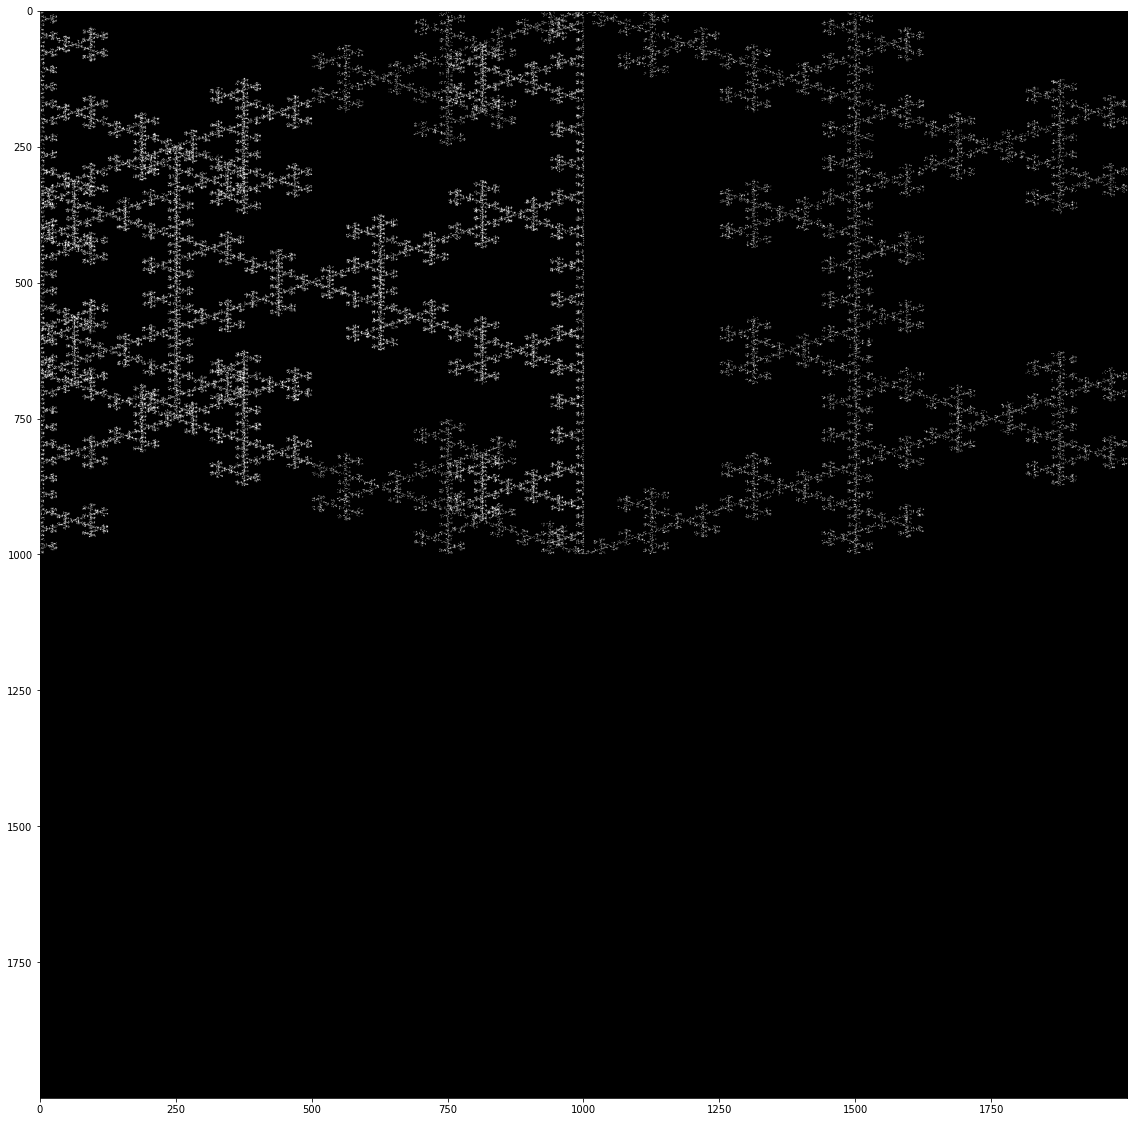

In [123]:
plt.figure(figsize=(20, 20))
plt.imshow(values, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

### Сравним 3 функции

In [160]:
def custom_gauss(left, right):
    A = left.copy()
    B = right.copy()
    count_iter = 0
    for i in range(A.shape[0]-1):
        for j in range(i+1, A.shape[0]):
            if A[i][i] != 0 and A[j][i] != 0:
                count_iter += 6
                koef = A[i][i]
                aa = A[i,:].copy() * A[j][i]
                bb = B[i,:].copy() * A[j][i]
                A[j, :] *= koef
                B[j:, :] *= koef
                A[j,:] -= aa 
                B[j,:] -= bb
            elif A[i][i] == 0 and A[j][i] != 0:
                count_iter += 4
                A[i] += A[j]
                B[i] += B[j]
                A[j] -= A[i]
                B[j] -= B[i]
        A = A.astype('float64')
        B = B.astype('float64')
        if A[i][i] != 0:
            count_iter += 2
            koef = A[i][i]
            A[i,:] /= koef
            B[i, :] /= koef
    if A[-1][-1] != 0:
            koef = A[-1][-1]
            A[-1, :] /= koef
            B[-1, :] /= koef
            count_iter += 2
    # получили ступенчатый вид
    for i in range(A.shape[1]-1,0,-1):
        for j in range(i):
            koef = A[j, i]
            A[j,i] = 0 # при каждой итерации все равно обнуляется лишь один элемент
            B[j,:] -= B[i,:]*koef
            count_iter += 4
    # print(B,sep='\n')
    return count_iter

def solving_inversed(A,B):
    return sla.inv(A) @ B

def solving_gauss(A,B):
    return sla.solve(A,B)


In [161]:
n_dimensions = [10, 50, 100, 200, 500, 1000]
m_dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
fixed_m, fixed_n = 20, 100

### Фиксированный m=100


In [167]:
gauss_times = []
inv_times = []
custom_times = []
for n in tqdm(n_dimensions):
    A = np.random.rand(n, n)
    B = np.random.rand(n, fixed_m)
    res_gauss = %timeit -o solving_gauss(A.copy(), B.copy())
    gauss_times.append(res_gauss.best)
    res_my = %timeit -o solving_inversed(A.copy(), B.copy())
    inv_times.append(res_my.best)
    res_cust = %timeit -o custom_gauss(A.copy(), B.copy())
    custom_times.append(res_cust.best)


  0%|          | 0/6 [00:00<?, ?it/s]

90.4 µs ± 53.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
36.1 µs ± 8.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


 17%|█▋        | 1/6 [00:22<01:53, 22.61s/it]

1.33 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
329 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
130 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


 33%|███▎      | 2/6 [00:38<01:14, 18.63s/it]

20.1 ms ± 6.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
617 µs ± 318 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
656 µs ± 83.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


 50%|█████     | 3/6 [00:52<00:50, 16.70s/it]

51.7 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.63 ms ± 87.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.91 ms ± 663 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


 67%|██████▋   | 4/6 [01:11<00:35, 17.62s/it]

193 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.6 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.4 ms ± 628 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


 83%|████████▎ | 5/6 [01:45<00:23, 23.36s/it]

927 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
66 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
134 ms ± 41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


100%|██████████| 6/6 [02:39<00:00, 26.58s/it]

4.8 s ± 705 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


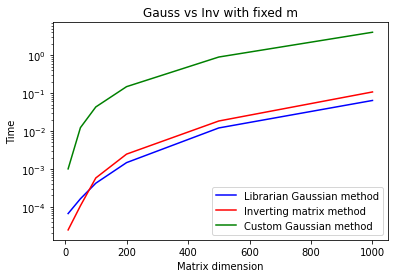

In [168]:
# логарифмический маштаб
plt.semilogy(n_dimensions, gauss_times, color='blue', label='Librarian Gaussian method')
plt.semilogy(n_dimensions, inv_times, color='red', label='Inverting matrix method')
plt.semilogy(n_dimensions, custom_times, color='green', label='Custom Gaussian method')
plt.title('Gauss vs Inv with fixed m')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Можем заметить, что кастомная функция ну уж слишком долго работает по сравнению с библиотечными, из-за больших размерностей матриц следующие эксперименты стоит выполнять только с библиотечными функциями

### Фиксированный n=100


  0%|          | 0/7 [00:00<?, ?it/s]

413 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


 14%|█▍        | 1/7 [00:07<00:44,  7.49s/it]

503 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
563 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


 29%|██▊       | 2/7 [00:20<00:53, 10.68s/it]

1.08 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.33 ms ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


 43%|████▎     | 3/7 [00:32<00:45, 11.43s/it]

1.75 ms ± 771 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.7 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


 57%|█████▋    | 4/7 [00:37<00:26,  8.94s/it]

2.53 ms ± 997 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.07 ms ± 840 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


 71%|███████▏  | 5/7 [00:45<00:16,  8.38s/it]

3.98 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.6 ms ± 5.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


 86%|████████▌ | 6/7 [00:54<00:08,  8.60s/it]

9.41 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.7 ms ± 4.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


100%|██████████| 7/7 [01:07<00:00,  9.69s/it]

13.1 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


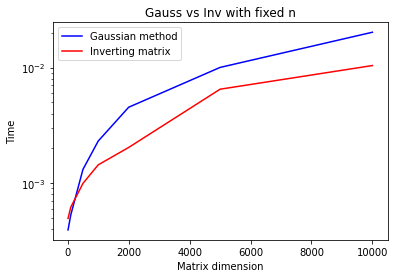

In [169]:
gauss_times = []
inv_times = []
for m in tqdm(m_dimensions):
    A = np.random.rand(fixed_n, fixed_n)
    B = np.random.rand(fixed_n, m)
    res_gauss = %timeit -o solving_gauss(A, B)
    gauss_times.append(res_gauss.best)
    res_my = %timeit -o solving_inversed(A, B)
    inv_times.append(res_my.best)

plt.semilogy(m_dimensions, gauss_times, color='blue', label='Gaussian method')
plt.semilogy(m_dimensions, inv_times, color='red', label='Inverting matrix')
plt.title('Gauss vs Inv with fixed n')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вариант с нахождением обратной матрицы в среднем работает лучше, ведь в методе Гаусcа мы должны производить действия еще и с правой частью матрицы (B), что долго при больших m, в отличии от варианта с обратной матрицей, где на B мы умножаем в самом конце. **Итог:** Метод Гаусса работает незначительно быстрее при малых размерностях m, но способ с нахождением обратной матрицы является более стабильным и в среднем требует меньше операций.
